In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns
import optuna
from sklearn.model_selection import train_test_split

In [3]:
df_rainfall = pd.read_csv("./df_rainfall2.csv",encoding="cp949")
df_2016 = pd.read_csv("./df_2016.csv",encoding="cp949")

In [4]:
#modeling
from sklearn.model_selection import train_test_split

In [5]:
df_rainfall.loc[df_rainfall['sex']==2,'sex']=0

In [6]:
df_rainfall

,area,date,frequency,sex,강원,경기,경남,경북,광주,대구,...,wind,습도,강수량,평균 현지기압(hPa),SO2,CO,O3,NO2,PM10,population
0,강원,2012-01-01,3,1,1,0,0,0,0,0,...,2.115385,66.749099,0.180000,994.9,0.009895,0.970417,0.019896,0.019994,84.337500,1535335
1,강원,2012-01-01,3,0,1,0,0,0,0,0,...,2.115385,66.749099,0.180000,994.9,0.009895,0.970417,0.019896,0.019994,84.337500,1535335
2,경기,2012-01-01,4,1,0,1,0,0,0,0,...,1.720000,72.503283,0.000000,1017.2,0.009183,0.983375,0.011821,0.030788,86.917182,11948596
3,경기,2012-01-01,5,0,0,1,0,0,0,0,...,1.720000,72.503283,0.000000,1017.2,0.009183,0.983375,0.011821,0.030788,86.917182,11948596
4,경남,2012-01-01,2,1,0,0,1,0,0,0,...,2.250000,61.764410,0.075000,1012.6,0.008967,0.653586,0.021243,0.017535,62.033865,3309559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49669,제주,2015-12-31,0,0,0,0,0,0,0,0,...,4.800000,72.122857,0.350000,1025.2,0.002907,0.538947,0.034653,0.009964,74.578947,624395
49670,충남,2015-12-31,0,1,0,0,0,0,0,0,...,1.300000,81.556134,0.066667,1025.0,0.004579,0.797685,0.017218,0.019566,53.569444,2077649
49671,충남,2015-12-31,0,0,0,0,0,0,0,0,...,1.300000,81.556134,0.066667,1025.0,0.004579,0.797685,0.017218,0.019566,53.569444,2077649
49672,충북,2015-12-31,1,1,0,0,0,0,0,0,...,1.500000,84.080871,0.200000,1009.3,0.005686,0.860159,0.009849,0.029108,64.007968,1583952


In [7]:
# 데이터 셋 분할 - 강수량 제외/ 비가온날 안온날
TRAIN = df_rainfall.drop(["area","date","tem_max",'tem_min',"강수량", 'population'],axis = 1)
TEST  = df_2016.drop(["area","date","rain","no_rain", "sex_2.0"],axis = 1)

In [8]:
df_2016

,area,date,frequency,rain,no_rain,sex_1.0,sex_2.0,강원,경기,경남,...,tem,wind,습도,일교차,평균 현지기압(hPa),SO2,CO,O3,NO2,PM10
0,경기,2016-01-01,NaN,0,1,1,0,0,1,0,...,0.301282,0.064865,0.757121,0.415525,0.907601,0.204790,0.689209,0.080572,0.466333,0.316613
1,경기,2016-01-01,NaN,0,1,0,1,0,1,0,...,0.301282,0.064865,0.757121,0.415525,0.907601,0.204790,0.689209,0.080572,0.466333,0.316613
2,경기,2016-01-02,NaN,0,1,1,0,0,1,0,...,0.405983,0.099459,0.747559,0.369863,0.785395,0.202198,0.514524,0.130960,0.428246,0.235635
3,경기,2016-01-02,NaN,0,1,0,1,0,1,0,...,0.405983,0.099459,0.747559,0.369863,0.785395,0.202198,0.514524,0.130960,0.428246,0.235635
4,경기,2016-01-03,NaN,0,1,1,0,0,1,0,...,0.401709,0.045405,0.851133,0.324201,0.739195,0.237006,0.751490,0.122278,0.506625,0.417334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12405,제주,2016-12-29,NaN,0,1,0,1,0,0,0,...,0.423077,0.621622,0.629746,0.132420,0.921013,0.066375,0.034400,0.429618,0.091217,0.101432
12406,제주,2016-12-30,NaN,0,1,1,0,0,0,0,...,0.416667,0.327027,0.546718,0.191781,0.949329,0.053315,0.029319,0.316166,0.166574,0.077656
12407,제주,2016-12-30,NaN,0,1,0,1,0,0,0,...,0.416667,0.327027,0.546718,0.191781,0.949329,0.053315,0.029319,0.316166,0.166574,0.077656
12408,제주,2016-12-31,NaN,0,1,1,0,0,0,0,...,0.450855,0.259459,0.554667,0.223744,0.931446,0.054888,0.031752,0.311933,0.179546,0.081211


In [9]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
df_rainfall.columns

Index(['area', 'date', 'frequency', 'sex', '강원', '경기', '경남', '경북', '광주', '대구',
       '대전', '부산', '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북', 'tem',
       'tem_min', 'tem_max', 'tem_range', 'wind', '습도', '강수량', '평균 현지기압(hPa)',
       'SO2', 'CO', 'O3', 'NO2', 'PM10', 'population'],
      dtype='object')

In [11]:
df_2016.columns

Index(['area', 'date', 'frequency', 'rain', 'no_rain', 'sex_1.0', 'sex_2.0',
       '강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북', 'tem', 'wind', '습도', '일교차',
       '평균 현지기압(hPa)', 'SO2', 'CO', 'O3', 'NO2', 'PM10'],
      dtype='object')

In [12]:
TTr=TRAIN[['frequency', 'sex', '강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산',
       '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북', 'tem',
       'wind','습도','tem_range', '평균 현지기압(hPa)', 'SO2', 'CO', 'O3', 'NO2',
       'PM10']]

In [13]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_ = MinMaxScaler()
uiu=TRAIN[[ 'sex',  'tem',
       'wind','습도','tem_range', '평균 현지기압(hPa)', 'SO2', 'CO', 'O3', 'NO2',
       'PM10']]
scaler_.fit(uiu)
u = scaler_.transform(uiu)

u = pd.DataFrame(u, columns=[ 'sex',  'tem',
       'wind','습도','tem_range', '평균 현지기압(hPa)', 'SO2', 'CO', 'O3', 'NO2',
       'PM10'])
InputFeature =u
InputFeature = sm.add_constant(InputFeature)

print(InputFeature.head())
model = sm.OLS(
    TRAIN['frequency'],
    InputFeature
)

model = model.fit()
print(model.params)

   const  sex       tem      wind        습도  tem_range  평균 현지기압(hPa)  \
0    1.0  1.0  0.250000  0.145990  0.623837   0.290984      0.436817   
1    1.0  0.0  0.250000  0.145990  0.623837   0.290984      0.436817   
2    1.0  1.0  0.226891  0.112340  0.689130   0.319672      0.784711   
3    1.0  0.0  0.226891  0.112340  0.689130   0.319672      0.784711   
4    1.0  1.0  0.327731  0.157447  0.567276   0.360656      0.712949   

        SO2        CO        O3       NO2      PM10  
0  0.378607  0.452618  0.227110  0.231323  0.146790  
1  0.378607  0.452618  0.227110  0.231323  0.146790  
2  0.350810  0.459621  0.127964  0.364526  0.151453  
3  0.350810  0.459621  0.127964  0.364526  0.151453  
4  0.342364  0.281402  0.243653  0.200985  0.106475  
const           1.455202
sex             0.011394
tem            -0.396865
wind            0.890995
습도              0.111772
tem_range       0.353645
평균 현지기압(hPa)   -1.350511
SO2             0.346241
CO             -2.493699
O3             -0.

C:\Users\kingo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
print( model.summary() )

                            OLS Regression Results                            
Dep. Variable:              frequency   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     425.7
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:16:45   Log-Likelihood:                -93796.
No. Observations:               49674   AIC:                         1.876e+05
Df Residuals:                   49662   BIC:                         1.877e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4552      0.089     16.309   

In [15]:
TTr.columns

Index(['frequency', 'sex', '강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산',
       '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북', 'tem', 'wind',
       '습도', 'tem_range', '평균 현지기압(hPa)', 'SO2', 'CO', 'O3', 'NO2', 'PM10'],
      dtype='object')

In [16]:
TEST.columns=['frequency', 'sex', '강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산',
       '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북', 'tem',
       'wind','습도','tem_range', '평균 현지기압(hPa)', 'SO2', 'CO', 'O3', 'NO2',
       'PM10']

In [17]:
TEST

,frequency,sex,강원,경기,경남,경북,광주,대구,대전,부산,...,tem,wind,습도,tem_range,평균 현지기압(hPa),SO2,CO,O3,NO2,PM10
0,NaN,1,0,1,0,0,0,0,0,0,...,0.301282,0.064865,0.757121,0.415525,0.907601,0.204790,0.689209,0.080572,0.466333,0.316613
1,NaN,0,0,1,0,0,0,0,0,0,...,0.301282,0.064865,0.757121,0.415525,0.907601,0.204790,0.689209,0.080572,0.466333,0.316613
2,NaN,1,0,1,0,0,0,0,0,0,...,0.405983,0.099459,0.747559,0.369863,0.785395,0.202198,0.514524,0.130960,0.428246,0.235635
3,NaN,0,0,1,0,0,0,0,0,0,...,0.405983,0.099459,0.747559,0.369863,0.785395,0.202198,0.514524,0.130960,0.428246,0.235635
4,NaN,1,0,1,0,0,0,0,0,0,...,0.401709,0.045405,0.851133,0.324201,0.739195,0.237006,0.751490,0.122278,0.506625,0.417334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12405,NaN,0,0,0,0,0,0,0,0,0,...,0.423077,0.621622,0.629746,0.132420,0.921013,0.066375,0.034400,0.429618,0.091217,0.101432
12406,NaN,1,0,0,0,0,0,0,0,0,...,0.416667,0.327027,0.546718,0.191781,0.949329,0.053315,0.029319,0.316166,0.166574,0.077656
12407,NaN,0,0,0,0,0,0,0,0,0,...,0.416667,0.327027,0.546718,0.191781,0.949329,0.053315,0.029319,0.316166,0.166574,0.077656
12408,NaN,1,0,0,0,0,0,0,0,0,...,0.450855,0.259459,0.554667,0.223744,0.931446,0.054888,0.031752,0.311933,0.179546,0.081211


In [18]:
TTr

,frequency,sex,강원,경기,경남,경북,광주,대구,대전,부산,...,tem,wind,습도,tem_range,평균 현지기압(hPa),SO2,CO,O3,NO2,PM10
0,3,1,1,0,0,0,0,0,0,0,...,-2.6,2.115385,66.749099,8.2,994.9,0.009895,0.970417,0.019896,0.019994,84.337500
1,3,0,1,0,0,0,0,0,0,0,...,-2.6,2.115385,66.749099,8.2,994.9,0.009895,0.970417,0.019896,0.019994,84.337500
2,4,1,0,1,0,0,0,0,0,0,...,-3.7,1.720000,72.503283,8.9,1017.2,0.009183,0.983375,0.011821,0.030788,86.917182
3,5,0,0,1,0,0,0,0,0,0,...,-3.7,1.720000,72.503283,8.9,1017.2,0.009183,0.983375,0.011821,0.030788,86.917182
4,2,1,0,0,1,0,0,0,0,0,...,1.1,2.250000,61.764410,9.9,1012.6,0.008967,0.653586,0.021243,0.017535,62.033865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49669,0,0,0,0,0,0,0,0,0,0,...,8.3,4.800000,72.122857,4.7,1025.2,0.002907,0.538947,0.034653,0.009964,74.578947
49670,0,1,0,0,0,0,0,0,0,0,...,1.2,1.300000,81.556134,8.8,1025.0,0.004579,0.797685,0.017218,0.019566,53.569444
49671,0,0,0,0,0,0,0,0,0,0,...,1.2,1.300000,81.556134,8.8,1025.0,0.004579,0.797685,0.017218,0.019566,53.569444
49672,1,1,0,0,0,0,0,0,0,0,...,0.5,1.500000,84.080871,7.7,1009.3,0.005686,0.860159,0.009849,0.029108,64.007968


<h1> 데이터 전처리 </h1>
도시별로 데이터를 나누고, 3일치 전의 데이터를 aggregagte하여 한 row로 만들어준다.<br>
도시정보는 한번만 넣어주면 되기 때문에, 3일전, 2일전, 1일전의 데이터에서 도시정보는 지워준다.

#1번방법 실패작 익거하면 tail로 값을 test 데이터에 붙이기 어려움
TRAIN_CITY = list()
for City in TTr.columns[2:19]:
    TRAIN_CITY.append(TTr.loc[TTr[City] == 1])

TRAIN_CITY[0][TRAIN_CITY[0]["sex"]==0]

TRAIN_CITY_LAG = list()
for CITY_idx in range(len(TRAIN_CITY)):
    for k in range(2):
        TRAIN_CITY_LAG.append(list())
        tslist=TRAIN_CITY[CITY_idx][TRAIN_CITY[CITY_idx]["sex"]==k]
        for i in range(3, tslist.shape[0]):
            TRAIN_CITY_LAG[CITY_idx+k].append(
                [tslist.iloc[i].tolist()[0]] +
                 tslist.iloc[i-3][19:].tolist() +
                 tslist.iloc[i-2][19:].tolist() +
                 tslist.iloc[i-1][19:].tolist() +
                 tslist.iloc[i].tolist()[1:]
                )

TRAIN_CITY_LAG = list()
for CITY_idx in range(len(TRAIN_CITY)):
    for k in range(2):
        TRAIN_CITY_LAG.append(list())
        tslist=TRAIN_CITY[CITY_idx][TRAIN_CITY[CITY_idx]["sex"]==k]
        for i in range(3, tslist.shape[0]):
            TRAIN_CITY_LAG[CITY_idx+k].append(
                [tslist.iloc[i].tolist()[0]] +
                 tslist.iloc[i-3][19:].tolist() +
                 tslist.iloc[i-2][19:].tolist() +
                 tslist.iloc[i-1][19:].tolist() +
                 tslist.iloc[i].tolist()[1:]
                )

In [19]:
TTr.columns[2:19]

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object')

In [20]:
#2번째방법 처음부터 나눠줘서 TEST데이터에도 붙이기 쉽게만들어준다 
TRAIN_CITY = list()
for City in TTr.columns[2:19]:
    for k in range(2):
        TRAIN_CITY.append(TTr.loc[(TTr[City] == 1)&(TTr['sex']==k)])

In [21]:
TRAIN_CITY[0]

,frequency,sex,강원,경기,경남,경북,광주,대구,대전,부산,...,tem,wind,습도,tem_range,평균 현지기압(hPa),SO2,CO,O3,NO2,PM10
1,3,0,1,0,0,0,0,0,0,0,...,-2.6,2.115385,66.749099,8.2,994.9,0.009895,0.970417,0.019896,0.019994,84.337500
35,0,0,1,0,0,0,0,0,0,0,...,-4.8,1.592308,73.382413,10.3,997.2,0.007465,1.022358,0.017785,0.021240,75.004065
69,0,0,1,0,0,0,0,0,0,0,...,-4.5,2.038462,67.635586,10.0,992.3,0.007608,0.927092,0.018721,0.021920,89.011952
103,2,0,1,0,0,0,0,0,0,0,...,-6.7,2.484615,59.315062,7.9,995.0,0.011946,0.738550,0.024721,0.016614,75.656489
137,1,0,1,0,0,0,0,0,0,0,...,-7.2,1.853846,57.964527,12.1,999.5,0.005420,0.707985,0.022125,0.019727,59.391635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49505,1,0,1,0,0,0,0,0,0,0,...,-2.9,1.600000,62.583854,7.8,999.6,0.003226,0.538333,0.025063,0.012494,37.191667
49539,4,0,1,0,0,0,0,0,0,0,...,-4.9,2.100000,44.125352,9.6,1001.6,0.003555,0.588511,0.021694,0.016391,31.974468
49573,1,0,1,0,0,0,0,0,0,0,...,-3.8,1.500000,48.723144,12.4,1003.1,0.004054,0.672222,0.019205,0.018184,38.222222
49607,0,0,1,0,0,0,0,0,0,0,...,-0.8,1.100000,66.434701,12.5,1000.5,0.004879,0.826809,0.016191,0.021578,51.536170


In [22]:
TRAIN_CITY_LAG = list()
for CITY_idx in range(len(TRAIN_CITY)):
    TRAIN_CITY_LAG.append(list())
    for i in range(3, TRAIN_CITY[CITY_idx].shape[0]):
        TRAIN_CITY_LAG[CITY_idx].append(
            [TRAIN_CITY[CITY_idx].iloc[i].tolist()[0]] +
             TRAIN_CITY[CITY_idx].iloc[i-3][19:].tolist() +
             TRAIN_CITY[CITY_idx].iloc[i-2][19:].tolist() +
             TRAIN_CITY[CITY_idx].iloc[i-1][19:].tolist() +
             TRAIN_CITY[CITY_idx].iloc[i].tolist()[1:]
             
            )

In [23]:
TEST_CITY = list()
for City in TEST.columns[2:19]:
    for k in range(2):
        TEST_CITY.append(TEST.loc[(TEST[City] == 1)&(TEST['sex']==k)])
    

TEST_CITY_prep = list()
for CITY_idx in range(len(TRAIN_CITY)):
    TEST_CITY_prep.append(pd.concat([TRAIN_CITY[CITY_idx].tail(3), TEST_CITY[CITY_idx]], axis=0))

TEST_CITY = TEST_CITY_prep

In [24]:
TEST_CITY [0]

,frequency,sex,강원,경기,경남,경북,광주,대구,대전,부산,...,tem,wind,습도,tem_range,평균 현지기압(hPa),SO2,CO,O3,NO2,PM10
49573,1.0,0,1,0,0,0,0,0,0,0,...,-3.800000,1.500000,48.723144,12.400000,1003.100000,0.004054,0.672222,0.019205,0.018184,38.222222
49607,0.0,0,1,0,0,0,0,0,0,0,...,-0.800000,1.100000,66.434701,12.500000,1000.500000,0.004879,0.826809,0.016191,0.021578,51.536170
49641,3.0,0,1,0,0,0,0,0,0,0,...,1.200000,1.500000,81.357943,7.000000,1001.000000,0.004844,0.886555,0.017168,0.021718,54.747899
731,NaN,0,1,0,0,0,0,0,0,0,...,0.318376,0.192100,0.617380,0.374429,0.581222,0.153674,0.598224,0.211331,0.223044,0.224586
733,NaN,0,1,0,0,0,0,0,0,0,...,0.418803,0.241164,0.630448,0.283105,0.475410,0.188903,0.573465,0.274978,0.209786,0.195354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,NaN,0,1,0,0,0,0,0,0,0,...,0.290598,0.121414,0.846866,0.305936,0.454545,0.094482,0.299867,0.227801,0.161658,0.104793
1453,NaN,0,1,0,0,0,0,0,0,0,...,0.241453,0.137214,0.672246,0.415525,0.563338,0.113813,0.269032,0.198922,0.200188,0.143339
1455,NaN,0,1,0,0,0,0,0,0,0,...,0.241453,0.227027,0.441315,0.246575,0.554396,0.132498,0.227482,0.233867,0.197074,0.161408
1457,NaN,0,1,0,0,0,0,0,0,0,...,0.241453,0.170478,0.466691,0.479452,0.599106,0.127761,0.268597,0.216931,0.175139,0.135239


#원본
TEST_CITY_LAG = list()
for CITY_idx in range(len(TEST_CITY)):
    for k in range(2):
    TRAIN_CITY_LAG.append(list())
    tslist=TRAIN_CITY[CITY_idx][TRAIN_CITY[CITY_idx]["sex"]==k]
    for i in range(3, TEST_CITY[CITY_idx].shape[0]):
            TEST_CITY_LAG[CITY_idx].append(
                [TEST_CITY[CITY_idx].iloc[i].tolist()[0]] +
                TEST_CITY[CITY_idx].iloc[i-3][:2].tolist() + TEST_CITY[CITY_idx].iloc[i-3][19:].tolist() +
                TEST_CITY[CITY_idx].iloc[i-2][:2].tolist() + TEST_CITY[CITY_idx].iloc[i-2][19:].tolist() +
                TEST_CITY[CITY_idx].iloc[i-1][:2].tolist() + TEST_CITY[CITY_idx].iloc[i-1][19:].tolist() +
                TEST_CITY[CITY_idx].iloc[i].tolist()[1:]
            )

TEST_CITY_LAG = list()
for CITY_idx in range(len(TEST_CITY)):
    for k in range(2):
        TEST_CITY_LAG.append(list())
        tslist=TEST_CITY[CITY_idx][TEST_CITY[CITY_idx]["sex"]==k]
        for i in range(3, tslist.shape[0]):
            TEST_CITY_LAG[CITY_idx+k].append(
                [tslist.iloc[i].tolist()[0]] +
                 tslist.iloc[i-3][19:].tolist() +
                 tslist.iloc[i-2][19:].tolist() +
                 tslist.iloc[i-1][19:].tolist() +
                 tslist.iloc[i].tolist()[1:]
                )

In [25]:
#테스트 시티 데이터 1번
TEST_CITY_LAG = list()
for CITY_idx in range(len(TRAIN_CITY)):
    TEST_CITY_LAG.append(list())
    for i in range(3, TEST_CITY[CITY_idx].shape[0]):
        TEST_CITY_LAG[CITY_idx].append(
            [TEST_CITY[CITY_idx].iloc[i].tolist()[0]] +
             TEST_CITY[CITY_idx].iloc[i-3][19:].tolist() +
             TEST_CITY[CITY_idx].iloc[i-2][19:].tolist() +
             TEST_CITY[CITY_idx].iloc[i-1][19:].tolist() +
             TEST_CITY[CITY_idx].iloc[i].tolist()[1:] 
            )

In [26]:
INDEX = ["Frequency"] + [Strs + '1' for Strs in TRAIN_CITY[CITY_idx].columns[19:].tolist()] + \
    [Strs + '2' for Strs in TRAIN_CITY[CITY_idx].columns[19:].tolist()] + \
    [Strs + '3' for Strs in  TRAIN_CITY[CITY_idx].columns[19:].tolist()] + \
    TRAIN_CITY[CITY_idx].columns[1:].tolist()

In [27]:
print(len(TRAIN_CITY_LAG[CITY_idx][0]))
print(len(TEST_CITY_LAG[CITY_idx][0]))
print(len(INDEX))

59
59
59


In [28]:
TRAIN_CITY_LAG_DF = list()
for CITY_idx in range(len(TRAIN_CITY)):
    TRAIN_CITY_LAG_DF.append(pd.DataFrame(TRAIN_CITY_LAG[CITY_idx], columns = INDEX))
    
TRAIN_FINAL = pd.concat(TRAIN_CITY_LAG_DF, axis=0)

In [29]:
TEST_CITY_LAG_DF = list()
for CITY_idx in range(len(TEST_CITY)):
    TEST_CITY_LAG_DF.append(pd.DataFrame(TEST_CITY_LAG[CITY_idx], columns = INDEX))
    
TEST_FINAL = pd.concat(TEST_CITY_LAG_DF, axis=0)

In [30]:
k=TRAIN_FINAL.drop(['Frequency'], axis=1)

In [31]:
k.columns

Index(['tem1', 'wind1', '습도1', 'tem_range1', '평균 현지기압(hPa)1', 'SO21', 'CO1',
       'O31', 'NO21', 'PM101', 'tem2', 'wind2', '습도2', 'tem_range2',
       '평균 현지기압(hPa)2', 'SO22', 'CO2', 'O32', 'NO22', 'PM102', 'tem3', 'wind3',
       '습도3', 'tem_range3', '평균 현지기압(hPa)3', 'SO23', 'CO3', 'O33', 'NO23',
       'PM103', 'sex', '강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울',
       '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북', 'tem', 'wind', '습도',
       'tem_range', '평균 현지기압(hPa)', 'SO2', 'CO', 'O3', 'NO2', 'PM10'],
      dtype='object')

In [32]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_ = MinMaxScaler()
scaler_.fit(k)
iris_scaled_ = scaler_.transform(k)

iris_scaled__df = pd.DataFrame(iris_scaled_, columns=k.columns)

In [33]:
iris_scaled__df.columns

Index(['tem1', 'wind1', '습도1', 'tem_range1', '평균 현지기압(hPa)1', 'SO21', 'CO1',
       'O31', 'NO21', 'PM101', 'tem2', 'wind2', '습도2', 'tem_range2',
       '평균 현지기압(hPa)2', 'SO22', 'CO2', 'O32', 'NO22', 'PM102', 'tem3', 'wind3',
       '습도3', 'tem_range3', '평균 현지기압(hPa)3', 'SO23', 'CO3', 'O33', 'NO23',
       'PM103', 'sex', '강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울',
       '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북', 'tem', 'wind', '습도',
       'tem_range', '평균 현지기압(hPa)', 'SO2', 'CO', 'O3', 'NO2', 'PM10'],
      dtype='object')

In [34]:
x_train,x_test,y_train,y_test = train_test_split(iris_scaled__df ,TRAIN_FINAL['Frequency'],test_size=0.15, random_state = 30)

In [35]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
model = xgb.XGBRegressor(**{'max_depth': 6, 'learning_rate': 0.00093826271337380827, 'n_estimators': 7000, 'colsample_bytree': 0.8957028343066205, 'colsample_bylevel': 0.9025689162309799, 'colsample_bynode': 0.9162080002967499, 'reg_lambda': 0.15785567877262532, 'reg_alpha': 0.01030903298357848, 'subsample': 0.75, 'min_child_weight': 7, 'gamma': 0.7559518311996747}, random_state = 1234)
bst = model.fit(x_train, y_train,verbose=False)
preds = model.predict(x_test)
rmse1=mean_squared_error(y_test, preds)**0.5
print("Test RMSE: %.4f" % rmse1)

Test RMSE: 1.2512


In [36]:
test_d=TEST_FINAL.drop(['Frequency'], axis=1)
test_p=model.predict(test_d)

In [37]:
#예측 한것 csv로 내보내기
IndexVector = []
for CITY_idx in range(len(TEST_CITY)):
    IndexVector = IndexVector + TEST_CITY[CITY_idx][3:].index.tolist()
z=pd.DataFrame({
    'INDEX': IndexVector,
    'PRED': test_p,
})
z=z.sort_values("INDEX")
z.index=z['INDEX']
HAP=df_2016[["area","date","sex_1.0"]]
value=pd.concat([HAP,z],axis=1)
lid=pd.read_csv("2-2_검증데이터셋 (2).csv",encoding='cp949')
z2=value
z3=lid
d_list=[]
for i in range(len(z2)):
    d_list.append(float(z2[(z2['date']==z3['yyyymmdd'][i])*(z2['sex_1.0']==int(z3['sex'][i]%2))*(z2['area']==z3['area'][i])]['PRED']))
lid['frequency']=d_list
lid.to_csv("220165.csv",encoding='ANSI')

In [38]:
test_d

,tem1,wind1,습도1,tem_range1,평균 현지기압(hPa)1,SO21,CO1,O31,NO21,PM101,...,tem,wind,습도,tem_range,평균 현지기압(hPa),SO2,CO,O3,NO2,PM10
0,-3.800000,1.500000,48.723144,12.400000,1003.100000,0.004054,0.672222,0.019205,0.018184,38.222222,...,0.318376,0.192100,0.617380,0.374429,0.581222,0.153674,0.598224,0.211331,0.223044,0.224586
1,-0.800000,1.100000,66.434701,12.500000,1000.500000,0.004879,0.826809,0.016191,0.021578,51.536170,...,0.418803,0.241164,0.630448,0.283105,0.475410,0.188903,0.573465,0.274978,0.209786,0.195354
2,1.200000,1.500000,81.357943,7.000000,1001.000000,0.004844,0.886555,0.017168,0.021718,54.747899,...,0.412393,0.130561,0.750838,0.365297,0.433681,0.252456,0.824296,0.271767,0.235671,0.280048
3,0.318376,0.192100,0.617380,0.374429,0.581222,0.153674,0.598224,0.211331,0.223044,0.224586,...,0.391026,0.266944,0.439533,0.324201,0.461997,0.200696,0.568409,0.358882,0.207844,0.304657
4,0.418803,0.241164,0.630448,0.283105,0.475410,0.188903,0.573465,0.274978,0.209786,0.195354,...,0.284188,0.177963,0.208381,0.328767,0.520119,0.140307,0.337508,0.267660,0.165508,0.095106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.267094,0.116757,0.653356,0.155251,0.685544,0.119648,0.426183,0.135882,0.226658,0.257437,...,0.290598,0.296216,0.637704,0.319635,0.569300,0.117438,0.313883,0.168909,0.234567,0.141861
361,0.314103,0.069189,0.813236,0.543379,0.687034,0.115615,0.739879,0.033996,0.289873,0.308555,...,0.230769,0.121081,0.594500,0.484018,0.679583,0.151079,0.392700,0.068392,0.351921,0.176619
362,0.356838,0.080000,0.924873,0.068493,0.558867,0.118818,0.695976,0.028904,0.313734,0.195410,...,0.230769,0.263784,0.506978,0.237443,0.679583,0.141585,0.341598,0.127354,0.286321,0.140644
363,0.290598,0.296216,0.637704,0.319635,0.569300,0.117438,0.313883,0.168909,0.234567,0.141861,...,0.226496,0.140541,0.618081,0.511416,0.724292,0.144387,0.446846,0.088560,0.319820,0.142105


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

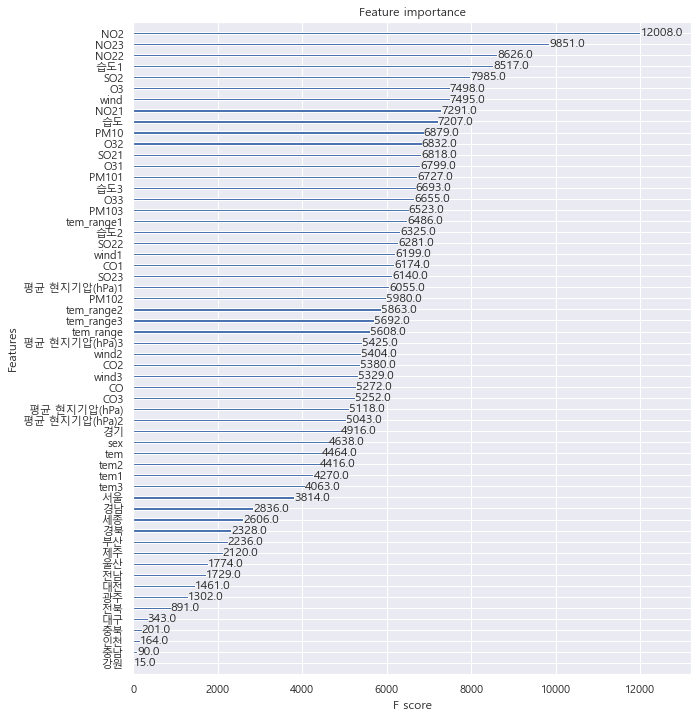

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance, plot_tree
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

fig,ax = plt.subplots(figsize = (10,12))
plot_importance(model, ax=ax)


In [37]:
import xgboost as xgb
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns
import optuna
from sklearn.model_selection import train_test_split
def objective(trial):

    params = {
        "objective": "reg:linear",
        "eval_metric":'rmse',
        "booster": 'gbtree',
        'tree_method':'gpu_hist', 'predictor':'gpu_predictor', 'gpu_id': 0, # GPU 사용시
        "verbosity": 0,
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        "learning_rate": trial.suggest_uniform('learning_rate', 0.0001, 0.99),
        'n_estimators': trial.suggest_int("n_estimators", 1000, 10000, step=100),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5, 1.0),
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.5, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-2, 1),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-2, 1),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),     
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 15),
        "gamma": trial.suggest_float("gamma", 0.1, 1.0, log=True),
    }
    

    model = xgb.XGBRegressor(**params, random_state = 1234)
    bst = model.fit(x_train, y_train,verbose=False)
    preds = bst.predict(x_test)
    rmse1=mean_squared_error(y_test, preds)**0.5
    return rmse1

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=1000, show_progress_bar=True)

[I 2022-06-23 00:43:29,603] A new study created in memory with name: no-name-9d1c86fe-d378-4293-8284-ecb7b9687d02
D:\anaconda\envs\asdfasdf\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2022-06-23 00:43:51,748] Trial 0 finished with value: 1.464333433582635 and parameters: {'max_depth': 4, 'learning_rate': 0.10354883817312148, 'n_estimators': 7700, 'colsample_bytree': 0.5865523168084243, 'colsample_bylevel': 0.8516826999209974, 'colsample_bynode': 0.9310469777902611, 'reg_lambda': 0.2406478856324643, 'reg_alpha': 0.21349909779068665, 'subsample': 0.65, 'min_child_weight': 12, 'gamma': 0.1481898757687084}. Best is trial 0 with value: 1.464333433582635.
[I 2022-06-23 00:44:30,471] Trial 1 finished with value: 2.6655696269110045 and parameters: {'max_depth': 8, 'learning_rate': 0.9594127802202527, 'n_estimators': 1800, 'colsample_bytree': 0.8190176801355971, 'colsample_bylevel': 0.7683381009880936, 'colsample_bynode': 0.5453648460035042, 'reg_lambda': 0.013839858079010165, 'reg_alpha': 0.0759051825174782, 'subsample': 0.65, 'min_child_weight': 2, 'gamma': 0.5206439895759964}. Best is trial 0 with value: 1.464333433582635.


KeyboardInterrupt: 

# LIGHT GBM

In [40]:
from sklearn.metrics import mean_squared_error
def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

In [42]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn!=0.22.0 in c:\users\kingo\anaconda3\lib\site-packages (from lightgbm) (1.0.2)



In [43]:
import lightgbm as lgb

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

def objective(trial):
    dtrain = lgb.Dataset(x_train, label=y_train)
    dtest = lgb.Dataset(x_test, label=y_test)

    param = {
        'objective': 'regression', # 회귀
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',3, 9),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
        'device' : "gpu",
        "gpu_platform_id": 0,
        "gpu_device_id": 0,
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(x_train,y_train, eval_set=[(x_test, y_test)], verbose=0)
    rmse = RMSE(y_test, lgb_model.predict(x_test))
    return rmse
        
study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective, n_trials=1000)

[I 2022-06-23 02:03:45,776] A new study created in memory with name: no-name-9eff5eec-ea18-4576-b107-89797c82e9f9
D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:03:48,131] Trial 0 finished with value: 1.6455120922367563 and parameters: {'max_depth': 3, 'learning_rate': 8.719501817701383e-06, 'n_estimators': 1919, 'min_child_samples': 63, 'subsample': 0.5368561100022021}. Best is trial 0 with value: 1.6455120922367563.
D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument

D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:05:00,308] Trial 13 finished with value: 1.3262694552535899 and parameters: {'max_depth': 7, 'learning_rate': 0.007169793519379172, 'n_estimators': 134, 'min_child_samples': 100, 'subsample': 0.41464037614755295}. Best is trial 11 with value: 1.2492449266232832.
D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:05:04,165] Trial 14 finis

D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:06:13,120] Trial 26 finished with value: 1.6173227633001315 and parameters: {'max_depth': 6, 'learning_rate': 4.469067609168641e-05, 'n_estimators': 1324, 'min_child_samples': 6, 'subsample': 0.5577940685142793}. Best is trial 11 with value: 1.2492449266232832.
D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:06:20,621] Trial 27 finish

D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:07:20,471] Trial 39 finished with value: 1.6347446612346912 and parameters: {'max_depth': 8, 'learning_rate': 0.00011837208694859353, 'n_estimators': 251, 'min_child_samples': 64, 'subsample': 0.7410406862342847}. Best is trial 37 with value: 1.2481041847240555.
D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:07:23,930] Trial 40 finis

D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:08:44,865] Trial 52 finished with value: 1.249559960783666 and parameters: {'max_depth': 8, 'learning_rate': 0.0057652322113746855, 'n_estimators': 1417, 'min_child_samples': 11, 'subsample': 0.6609608259234246}. Best is trial 37 with value: 1.2481041847240555.
D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:08:53,583] Trial 53 finish

D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:09:59,535] Trial 65 finished with value: 1.2617588048953379 and parameters: {'max_depth': 5, 'learning_rate': 0.0019484977525968108, 'n_estimators': 1426, 'min_child_samples': 79, 'subsample': 0.5346987558853504}. Best is trial 37 with value: 1.2481041847240555.
D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:10:02,912] Trial 66 finis

D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:11:39,504] Trial 78 finished with value: 1.4047303873578272 and parameters: {'max_depth': 9, 'learning_rate': 0.0008393192678130449, 'n_estimators': 639, 'min_child_samples': 56, 'subsample': 0.49519022022637715}. Best is trial 37 with value: 1.2481041847240555.
D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:11:48,803] Trial 79 finis

D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:14:10,514] Trial 91 finished with value: 1.2488347002973177 and parameters: {'max_depth': 8, 'learning_rate': 0.00784052622912264, 'n_estimators': 1592, 'min_child_samples': 70, 'subsample': 0.5677895020563172}. Best is trial 37 with value: 1.2481041847240555.
D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:14:21,753] Trial 92 finishe

D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:16:16,283] Trial 104 finished with value: 1.2519420494062783 and parameters: {'max_depth': 8, 'learning_rate': 0.001179681851046596, 'n_estimators': 2488, 'min_child_samples': 69, 'subsample': 0.9999025250721247}. Best is trial 37 with value: 1.2481041847240555.
D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:16:26,696] Trial 105 fini

D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:18:13,040] Trial 117 finished with value: 1.249693204640265 and parameters: {'max_depth': 7, 'learning_rate': 0.0034880136929952414, 'n_estimators': 1630, 'min_child_samples': 45, 'subsample': 0.6054366528470189}. Best is trial 37 with value: 1.2481041847240555.
D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:18:19,733] Trial 118 fini

D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:19:50,601] Trial 130 finished with value: 1.249545991752306 and parameters: {'max_depth': 8, 'learning_rate': 0.00584222680666806, 'n_estimators': 1343, 'min_child_samples': 53, 'subsample': 0.5006269740289176}. Best is trial 37 with value: 1.2481041847240555.
D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-06-23 02:19:58,155] Trial 131 finish

In [45]:
lgmodel = lgb.LGBMRegressor(**{'max_depth': 8, 'learning_rate': 0.00508579858482456, 'n_estimators': 2875, 'min_child_samples': 70, 'subsample': 0.8413837341491881,'device' : "gpu"})
lgb_model = lgmodel.fit(x_train,y_train, eval_set=[(x_test, y_test)], verbose=0)
lgb_pred = lgb_model.predict(TEST_FINAL.drop(['Frequency'], axis=1))
#예측 한것 csv로 내보내기
IndexVector = []
for CITY_idx in range(len(TEST_CITY)):
    IndexVector = IndexVector + TEST_CITY[CITY_idx][3:].index.tolist()
z=pd.DataFrame({
    'INDEX': IndexVector,
    'PRED': lgb_pred,
})
z=z.sort_values("INDEX")
z.index=z['INDEX']
HAP=df_2016[["area","date","sex_1.0"]]
value=pd.concat([HAP,z],axis=1)
lid=pd.read_csv("2-2_검증데이터셋 (2).csv",encoding='cp949')
z2=value
z3=lid
d_list=[]
for i in range(len(z2)):
    d_list.append(float(z2[(z2['date']==z3['yyyymmdd'][i])*(z2['sex_1.0']==int(z3['sex'][i]%2))*(z2['area']==z3['area'][i])]['PRED']))
lid['frequency']=d_list
lid.to_csv("220165.csv",encoding='ANSI')

D:\anaconda\envs\asdfasdf\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [47]:
from sklearn.ensemble import VotingRegressor
import xgboost as xgb
import lightgbm as lgb
lgmodel = lgb.LGBMRegressor(**{'max_depth': 8, 'learning_rate': 0.00508579858482456, 'n_estimators': 2875, 'min_child_samples': 70, 'subsample': 0.8413837341491881})
xgmodel = xgb.XGBRegressor(**{'max_depth': 6, 'learning_rate': 0.00093826271337380827, 'n_estimators': 7000, 'colsample_bytree': 0.8957028343066205, 'colsample_bylevel': 0.9025689162309799, 'colsample_bynode': 0.9162080002967499, 'reg_lambda': 0.15785567877262532, 'reg_alpha': 0.01030903298357848, 'subsample': 0.75, 'min_child_weight': 7, 'gamma': 0.7559518311996747}, random_state = 1234)

#lgb_model = model.fit(x_train,y_train, eval_set=[(x_test, y_test)], verbose=0)
#rmse = RMSE(y_test, lgb_model.predict(x_test))

single_models = [
    ('lgmodel', lgmodel),
    ('xgmodel', xgmodel)
]
voting_regressor = VotingRegressor(single_models, n_jobs=-1)


# 앙상블 voting 사용

In [48]:
voting_regressor.fit(x_train,y_train)
voting_pred = voting_regressor.predict(x_test)
rmse = RMSE(y_test, voting_pred)

In [49]:
rmse = RMSE(y_test, voting_pred)
rmse

1.2479715630781942

In [50]:
test_d=TEST_FINAL.drop(['Frequency'], axis=1)
test_p=voting_regressor.predict(test_d)

In [51]:
#예측 한것 csv로 내보내기
IndexVector = []
for CITY_idx in range(len(TEST_CITY)):
    IndexVector = IndexVector + TEST_CITY[CITY_idx][3:].index.tolist()
z=pd.DataFrame({
    'INDEX': IndexVector,
    'PRED': test_p,
})
z=z.sort_values("INDEX")
z.index=z['INDEX']
HAP=df_2016[["area","date","sex_1.0"]]
value=pd.concat([HAP,z],axis=1)
lid=pd.read_csv("2-2_검증데이터셋 (2).csv",encoding='cp949')
z2=value
z3=lid
d_list=[]
for i in range(len(z2)):
    d_list.append(float(z2[(z2['date']==z3['yyyymmdd'][i])*(z2['sex_1.0']==int(z3['sex'][i]%2))*(z2['area']==z3['area'][i])]['PRED']))
lid['frequency']=d_list
lid.to_csv("220165.csv",encoding='ANSI')


# 딥러닝


In [ ]:
def create_dataset(dataframe, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('Frequency')
    return tf.data.Dataset.from_tensor_slices((dict(dataframe), labels)) \
          .shuffle(buffer_size=len(dataframe)) \
          .batch(batch_size)

In [ ]:
feature_columns = []

# 수치형 열(Numeric col)은 실수값을 변형시키지 않고 그대로 전달

for header in [  'tem1', 'wind1', 'hu1', 'tem_range1', 'hPa1',
       'SO21', 'CO1', 'O31', 'NO21', 'PM101', 'tem2', 'wind2', 'hu2',
       'tem_range2', 'hPa2', 'SO22', 'CO2', 'O32', 'NO22', 'PM102',
       'tem3', 'wind3', 'hu3', 'tem_range3', 'hPa3', 'SO23', 'CO3',
       'O33', 'NO23', 'PM103', 'sex', 'gw', 'gg', 'gn', 'gb', 'gj', 'dg', 'dj', 'bs', 'su',
       'sj', 'us', 'ic', 'jn', 'jb', 'jj', 'cn', 'cb', 'tem',
       'wind', 'hu', 'tem_range', 'hPa', 'SO2', 'CO', 'O3', 'NO2',
       'PM10']:
    feature_columns.append(tf.feature_column.numeric_column(header))

In [ ]:
df_rainfall=TRAIN_FINAL

In [ ]:
df_rainfall.columns=['Frequency', 'tem1', 'wind1', 'hu1', 'tem_range1', 'hPa1',
       'SO21', 'CO1', 'O31', 'NO21', 'PM101', 'tem2', 'wind2', 'hu2',
       'tem_range2', 'hPa2', 'SO22', 'CO2', 'O32', 'NO22', 'PM102',
       'tem3', 'wind3', 'hu3', 'tem_range3', 'hPa3', 'SO23', 'CO3',
       'O33', 'NO23', 'PM103', 'sex', 'gw', 'gg', 'gn', 'gb', 'gj', 'dg', 'dj', 'bs', 'su',
       'sj', 'us', 'ic', 'jn', 'jb', 'jj', 'cn', 'cb', 'tem',
       'wind', 'hu', 'tem_range', 'hPa', 'SO2', 'CO', 'O3', 'NO2',
       'PM10']

In [ ]:
df_rainfall=df_rainfall.astype(float)

In [ ]:
TRAIN_FINAL.columns

In [ ]:
df_rainfall.columns

In [ ]:
# 전체데이터를 Training set과 Test set으로 나누기

train, test = train_test_split(df_rainfall, test_size=0.2, random_state=30)

In [ ]:
train_ds = create_dataset(train)
test_ds = create_dataset(test)

In [ ]:
#1번모델
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
model = tf.keras.models.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns=feature_columns),
    tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=128, activation='linear'),  
  tf.keras.layers.Dropout(rate=0.1),
  tf.keras.layers.Dense(units=128, activation='linear'),
  tf.keras.layers.Dense(units=1, activation='linear')
])
# Call-back 함수
# CheckPoint: Epoch 마다 validation 성능을 검증하여, best performance 일 경우 저장
CP = ModelCheckpoint(filepath='Model/{epoch:03d}-{rmse:.4f}-{val_rmse:.4f}.hdf5',
            monitor='val_rmse', verbose=0, save_best_only=True, mode='min')
#minitor -> loss -> val_loss

# Learning Rate 줄여나가기
LR = ReduceLROnPlateau(monitor='val_rmse', factor=0.98, patience=9,
                       verbose=0, min_lr=1e-8)
# factor: Learning rate에 곱할 것.
#0.1 -> 0.08 -> 0.064 ....
#monitor='loss' -> monitor='val_loss'

CALLBACK = [CP, LR]
# 모델 컴파일 후, 학습되면서 생기는 손실과 정확도 지표 출력
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=adam,
              loss = tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

history = model.fit(train_ds, validation_data=test_ds, epochs=10000, use_multiprocessing=True,
                    callbacks=CALLBACK)

In [ ]:
pred_2016=TRAIN_FINAL

In [ ]:
pred_2016.columns=['Frequency', 'tem1', 'wind1', 'hu1', 'tem_range1', 'hPa1',
       'SO21', 'CO1', 'O31', 'NO21', 'PM101', 'tem2', 'wind2', 'hu2',
       'tem_range2', 'hPa2', 'SO22', 'CO2', 'O32', 'NO22', 'PM102',
       'tem3', 'wind3', 'hu3', 'tem_range3', 'hPa3', 'SO23', 'CO3',
       'O33', 'NO23', 'PM103', 'sex', 'gw', 'gg', 'gn', 'gb', 'gj', 'dg', 'dj', 'bs', 'su',
       'sj', 'us', 'ic', 'jn', 'jb', 'jj', 'cn', 'cb', 'tem',
       'wind', 'hu', 'tem_range', 'hPa', 'SO2', 'CO', 'O3', 'NO2',
       'PM10']

In [ ]:
pred_2016=pred_2016.astype(float)

In [ ]:
TEST_ds = create_dataset(pred_2016)

In [ ]:
#예측 한것 csv로 내보내기
preds = model.predict(TEST_ds)
IndexVector = []
Gender = []
Location = []
for CITY_idx in range(len(TEST_CITY)):
    IndexVector = IndexVector + TEST_CITY[CITY_idx][3:].index.tolist()
z=pd.DataFrame({
    'INDEX': IndexVector,
    'PRED': test_p,
})
z=z.sort_values("INDEX")
z.index=z['INDEX']
HAP=df_2016[["area","date","sex_1.0"]]
value=pd.concat([HAP,z],axis=1)
lid=pd.read_csv("2-2_검증데이터셋 (2).csv",encoding='cp949')
z2=value
z3=lid
d_list=[]
for i in range(len(z2)):
    d_list.append(float(z2[(z2['date']==z3['yyyymmdd'][i])*(z2['sex_1.0']==int(z3['sex'][i]%2))*(z2['area']==z3['area'][i])]['PRED']))
lid['frequency']=d_list
lid.to_csv("220165.csv",encoding='ANSI')